## Exercício - 01

- Definir 3 cosmologias com diferentes modelos de *Dark Matter*
- Fazer gráficos mostrando a evolução de cada parâmetro de densidade em função do *redshift* 
- Fazer um gráfico da função de Hubble em função do *redshift*

### 1º - Importando bibliotecas e iniciando NumCosmo

In [1]:
#------------------ BIBLIOTECAS ------------------ 

try:
  import gi
  gi.require_version('NumCosmo', '1.0')
  gi.require_version('NumCosmoMath', '1.0')
except:
  pass

from gi.repository import GObject
from gi.repository import NumCosmo as Nc
from gi.repository import NumCosmoMath as Ncm

import numpy as np
import matplotlib.pyplot as plt
import sys
%matplotlib inline
import math

import ipywidgets as widgets
from ipywidgets import interactive
from ipywidgets import FloatSlider

#------------------ COMANDO INICIAL ------------------ 


Ncm.cfg_init ()
Ncm.cfg_set_log_handler (lambda msg: sys.stdout.write (msg) and sys.stdout.flush ())

#--------------- DICIONÁRIO DE CORES -----------------


cores = {'pr': '\033[30m',
         'vm': '\033[31m', 
         'lm': '\033[32m',
         'am': '\033[33m',
         'az': '\033[34m',
         'mg': '\033[35m',
         'cn': '\033[36m',
         'lp': '\033[m'}

ImportError: cannot import name NumCosmo, introspection typelib not found

### 2º - Um cosmo pra chamar de meu

Agora precisamos criar as três cosmologias, para isso iremos criar um objeto para cada uma das 3 classes a seguir:

In [71]:
meuCosmo1 = Nc.HICosmoDEXcdm.new()
meuCosmo2 = Nc.HICosmoDECpl.new()
meuCosmo3 = Nc.HICosmoDEJbp.new()

meuCosmo2.param_set_by_name('w0', -0.5)
meuCosmo2.param_set_by_name('w1', -0.5)

meuCosmo3.param_set_by_name('w0', -0.5)
meuCosmo3.param_set_by_name('w1', -0.5)

É necessário também mudar os valores para os parâmetros W0 e W1, que fazem parte da equação de estado, pois os valores pré-definidos equivalem à um valor constante, igual ao modelo 'XCDM'. Nesse caso, utilizei 0.5 para os dois.

Depois disso, precisamos agora entender quais são os parâmetros dos nossos modelos, podemos fazer isso de duas formas: Utilizando a função *dir()* do python ou utiizando a função *pretty_log()* da NumCosmo.

Com a função *dir()* iremos obter uma lista de todos os parâmetros e métodos do nosso objeto em ordem alfabética, logo pode ficar meio confuso de diferenciá-los. 
Já com a NumCosmo precisamos primeiro acessar a seção *Model Set (MSEt)* onde criaremos uma lista com os modelos, a função *new_array()* criará nosso objeto 'set1'. Depois iremos usar a função *pretty_log()* para imprimir os parâmetros do modelo e seus valores atuais.

In [72]:
dir(meuCosmo1)

['Dc',
 'E',
 'E2',
 'E2Omega_b',
 'E2Omega_c',
 'E2Omega_de',
 'E2Omega_de_onepw',
 'E2Omega_g',
 'E2Omega_k',
 'E2Omega_m',
 'E2Omega_mnu',
 'E2Omega_mnu_n',
 'E2Omega_nu',
 'E2Omega_r',
 'E2Omega_t',
 'E2Press_mnu',
 'E2Press_mnu_n',
 'Em2',
 'H',
 'H0',
 'H_number_density',
 'He_number_density',
 'MassNuInfo',
 'NMassNu',
 'Neff',
 'Omega_b0',
 'Omega_b0h2',
 'Omega_c0',
 'Omega_c0h2',
 'Omega_g0',
 'Omega_g0h2',
 'Omega_k0',
 'Omega_m0',
 'Omega_m0h2',
 'Omega_mnu0',
 'Omega_mnu0_n',
 'Omega_mnu0h2',
 'Omega_nu0',
 'Omega_nu0h2',
 'Omega_r0',
 'Omega_r0h2',
 'Omega_t0',
 'Press_mnu0',
 'Press_mnu0_n',
 'RH_Mpc',
 'RH_planck',
 'T',
 'T_gamma0',
 'Tmin',
 'XHe',
 'Yp_1H',
 'Yp_4He',
 '__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__gdoc__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gpointer__',
 '__grefcount__',
 '__gsignals__',
 '__gt__',
 '__gtype__',
 '__hash__',
 '__info__',
 '__init__',
 '__

In [73]:
set2 = Ncm.MSet.new_array ([meuCosmo2])
set2.pretty_log ()

#----------------------------------------------------------------------------------
# Model[03000]:
#   - NcHICosmo : Chevalier-Polarski-Linder parametrization
#----------------------------------------------------------------------------------
# Model parameters
#   -      H0[00]:  67.36               [FIXED]
#   -  Omegac[01]:  0.2568              [FIXED]
#   -  Omegax[02]:  0.7                 [FIXED]
#   - Tgamma0[03]:  2.7245              [FIXED]
#   -      Yp[04]:  0.24                [FIXED]
#   -    ENnu[05]:  3.046               [FIXED]
#   -  Omegab[06]:  0.0432              [FIXED]
#   -      w0[07]: -0.5                 [FIXED]
#   -      w1[08]: -0.5                 [FIXED]


### 3º - Gráfico da Função de Hubble

Primeiro iremos montar o gráfico da função de Hubble em função do redshift. Vamos então criar uma lista com diversos valores de redshift; isso pode ser feito facilmente utilizando numpy.

In [74]:
redshift = np.linspace(0, 5, num=500)

Uma das funções presentes nas classes de modelos cosmológicos da NumCosmo é a função *E()*, conhecida como a função de Hubble normalizada.

$$E(t) \equiv \frac{H(t)}{H_0},$$

$$H(t) = E(t)*H_0$$

Como queremos fazer um gráfico de H(t), então utilizamos a função pronta e multiplicamos o resultado por H0 que já está disponível como parâmetro, como mostramos no *pretty_log*.

In [75]:
H1 = np.array([meuCosmo1.E(z) for z in redshift]) * meuCosmo1["H0"]
H2 = np.array([meuCosmo2.E(z) for z in redshift]) * meuCosmo2["H0"]
H3 = np.array([meuCosmo3.E(z) for z in redshift]) * meuCosmo3["H0"]

Agora podemos montar o gráfico com essas 4 listas:

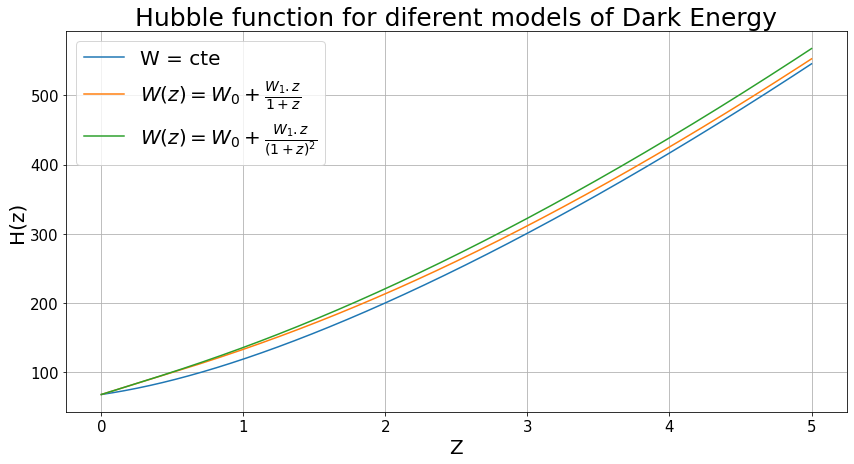

In [76]:
plt.figure(figsize=(14,7))

plt.title("Hubble function for diferent models of Dark Energy", fontsize=25)

plt.plot(redshift, H1, label='W = cte')
plt.plot(redshift, H2, label=r'$W(z) = W_0 + \frac{W_1.z}{1 + z}$')
plt.plot(redshift, H3, label=r'$W(z) = W_0 + \frac{W_1.z}{(1 + z)^2}$')

plt.xlabel("Z", fontsize=20)
plt.ylabel("H(z)", fontsize=20)

plt.tick_params(labelsize=15)
plt.legend(loc="best", fontsize=20)
plt.grid ()
plt.show ()


In [77]:
if sum(H1 - H2) == 0 and sum(H2 - H3) == 0 and sum(H1 - H3) == 0:
    
    print(f'{cores["lm"]}É tudo igual')
    

### 4º - Gráfico dos parâmetros de densidade

Por fim, precisamos criar o gráfico dos parâmetros de densidade em função do redshift. Utilizaremos as funções:

- *E2Omega_r()*
- *E2Omega_c()*
- *E2Omega_b()*
- *E2Omega_de()*

Essas funções têm como parâmetro um valor para redshift e nos devolvem o cálculo:

$$E^2.\Omega_x = \frac{\rho_x(z)}{\rho_{crit}} $$

Logo, teremos que dividir por $E^2$ dos dois lado para conseguir os valores de parâmetro de densidade.
Vamos agora montar as listas para cada modelo.


In [78]:
# ------------------------- MODELO 1 -----------------------------


E2 = np.array([meuCosmo1.E2(z) for z in redshift])

rad = np.array([meuCosmo1.E2Omega_r(z) for z in redshift]) / E2
bar = np.array([meuCosmo1.E2Omega_b(z) for z in redshift]) / E2
cdm = np.array([meuCosmo1.E2Omega_c(z) for z in redshift]) / E2
de = np.array([meuCosmo1.E2Omega_de(z) for z in redshift]) / E2

param_mod1 = [redshift, rad, bar, cdm, de]


# ------------------------- MODELO 2 -----------------------------


E2 = np.array([meuCosmo2.E2(z) for z in redshift])

rad = np.array([meuCosmo2.E2Omega_r(z) for z in redshift]) / E2
bar = np.array([meuCosmo2.E2Omega_b(z) for z in redshift]) / E2
cdm = np.array([meuCosmo2.E2Omega_c(z) for z in redshift]) / E2
de = np.array([meuCosmo2.E2Omega_de(z) for z in redshift]) / E2

param_mod2 = [redshift, rad, bar, cdm, de]


# ------------------------- MODELO 3 -----------------------------


E2 = np.array([meuCosmo3.E2(z) for z in redshift])

rad = np.array([meuCosmo3.E2Omega_r(z) for z in redshift]) / E2
bar = np.array([meuCosmo3.E2Omega_b(z) for z in redshift]) / E2
cdm = np.array([meuCosmo3.E2Omega_c(z) for z in redshift]) / E2
de = np.array([meuCosmo3.E2Omega_de(z) for z in redshift]) / E2

param_mod3 = [redshift, rad, bar, cdm, de]

Com as três listas de parâmetros prontas, podemos começar a montar os gráficos da evolução deles para cada modelo de *Dark energy*. Como elas são exatamente iguai, será prático criar uma função para repetir todos os passo da produção do gráfico.

In [79]:
def densities_graph(model, name='?'):

    plt.figure(figsize=(14, 7))

    plt.title(f"Density parameters evolution for the model {name}", fontsize=25)

    plt.plot(model[0], model[1], label=r'$\Omega_r$')
    plt.plot(model[0], model[2], label=r'$\Omega_b$')
    plt.plot(model[0], model[3], label=r'$\Omega_c$')
    plt.plot(model[0], model[4], label=r'$\Omega_{de}$')

    plt.xlabel("Z", fontsize=20)

    plt.ylim (0, 1.0)
    plt.tick_params(labelsize=15)
    plt.legend(loc="best", fontsize=20)
    plt.grid ()
    plt.show ()



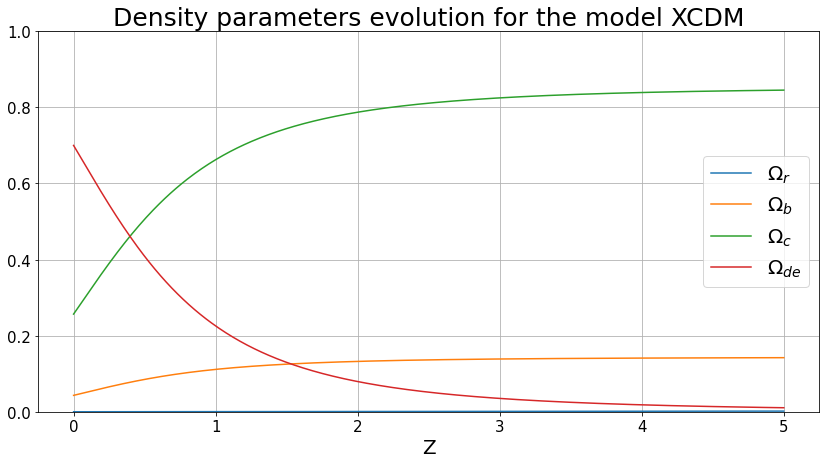

In [80]:
densities_graph(param_mod1, 'XCDM')

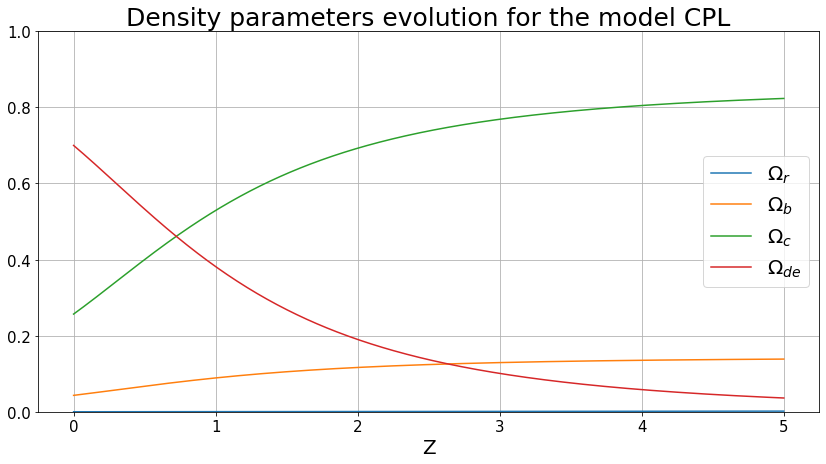

In [81]:
densities_graph(param_mod2, 'CPL')

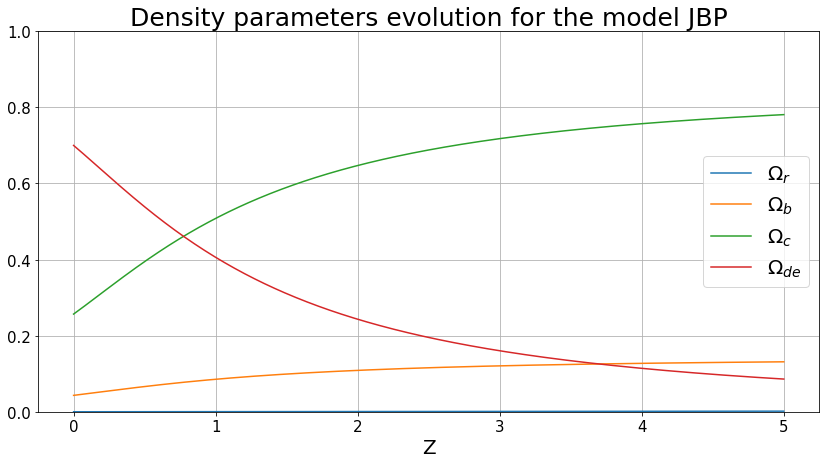

In [82]:
densities_graph(param_mod3, 'JBP')

Os três gráficos são bem parecidos, então vamos realizar um teste para ter certeza que estamos trabalhando em modelos diferentes.

In [83]:
print(sum(param_mod1[2] - param_mod2[2]))

5.958724081685843


Perfeito. Agora iremos montar um gráfico final, mostrando somente a curva da *Dark energy* para os três diferentes modelos.

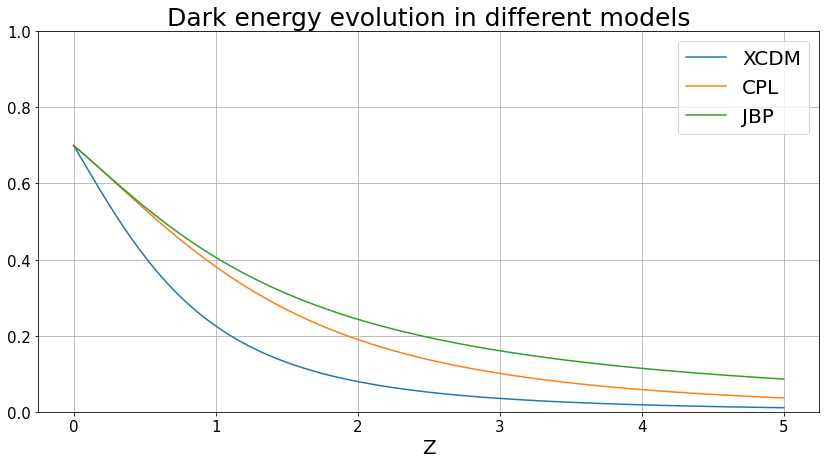

In [84]:
plt.figure(figsize=(14, 7))

plt.title(f"Dark energy evolution in different models", fontsize=25)

plt.plot(redshift, param_mod1[4], label='XCDM')
plt.plot(redshift, param_mod2[4], label='CPL')
plt.plot(redshift, param_mod3[4], label='JBP')

plt.xlabel("Z", fontsize=20)

plt.ylim (0, 1.0)
plt.tick_params(labelsize=15)
plt.legend(loc="best", fontsize=20)
plt.grid ()
plt.show ()

Com isso finalizamos o objetivo desse Jupyter Notebook, os gráficos que obtemos mostra as curvas levemente diferentes para os modelos que programamos, porém todas sempre convergem para o mesmo ponto em $z = 0$, que corresponde aos valores calculados atualmente para o parâmetro de densidade da *Dark Energy*. Agora, divirta-se mudando os valores de W0 e W1 para os outros modelos.